In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('./train.csv')

In [8]:
data.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

<Figure size 1000x1000 with 0 Axes>

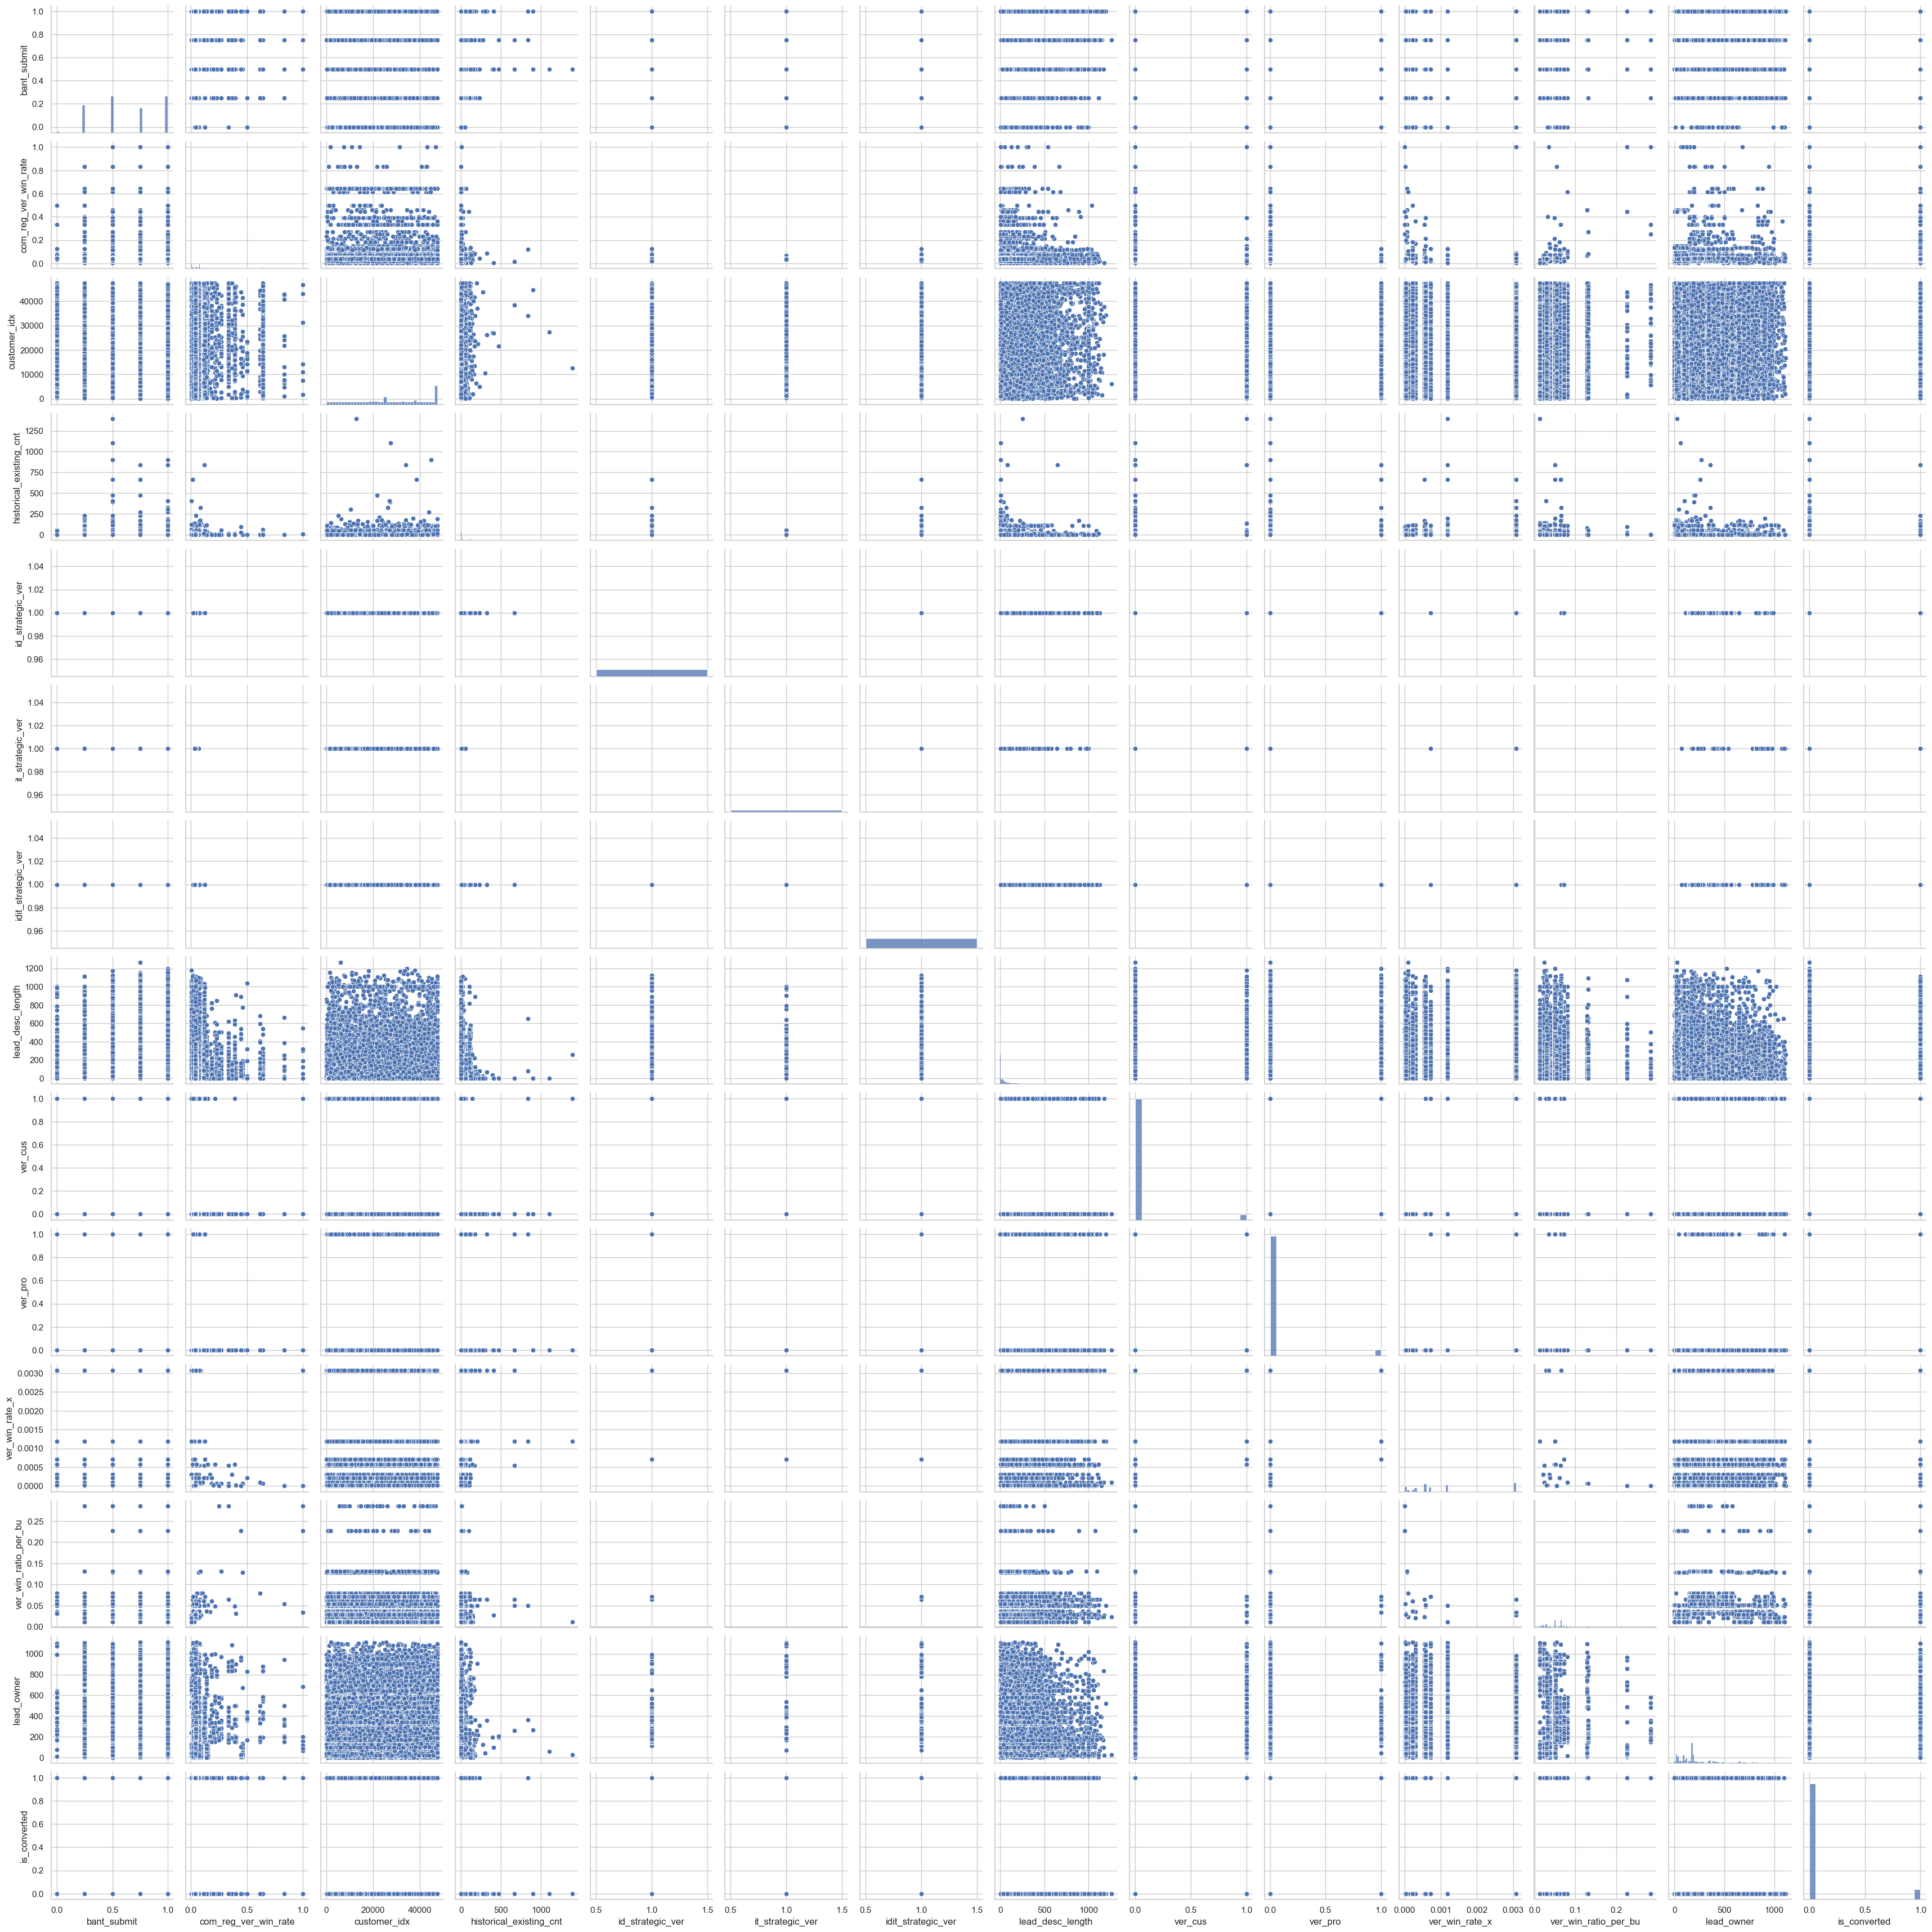

In [80]:
plt.figure(figsize = (10,10))
sns.set(style='whitegrid')
sns.pairplot(data)
plt.show()

In [88]:
df_train = pd.read_csv("train.csv")

In [89]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [92]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]


for col in label_columns:
    df_train[col] = label_encoding(df_train[col])

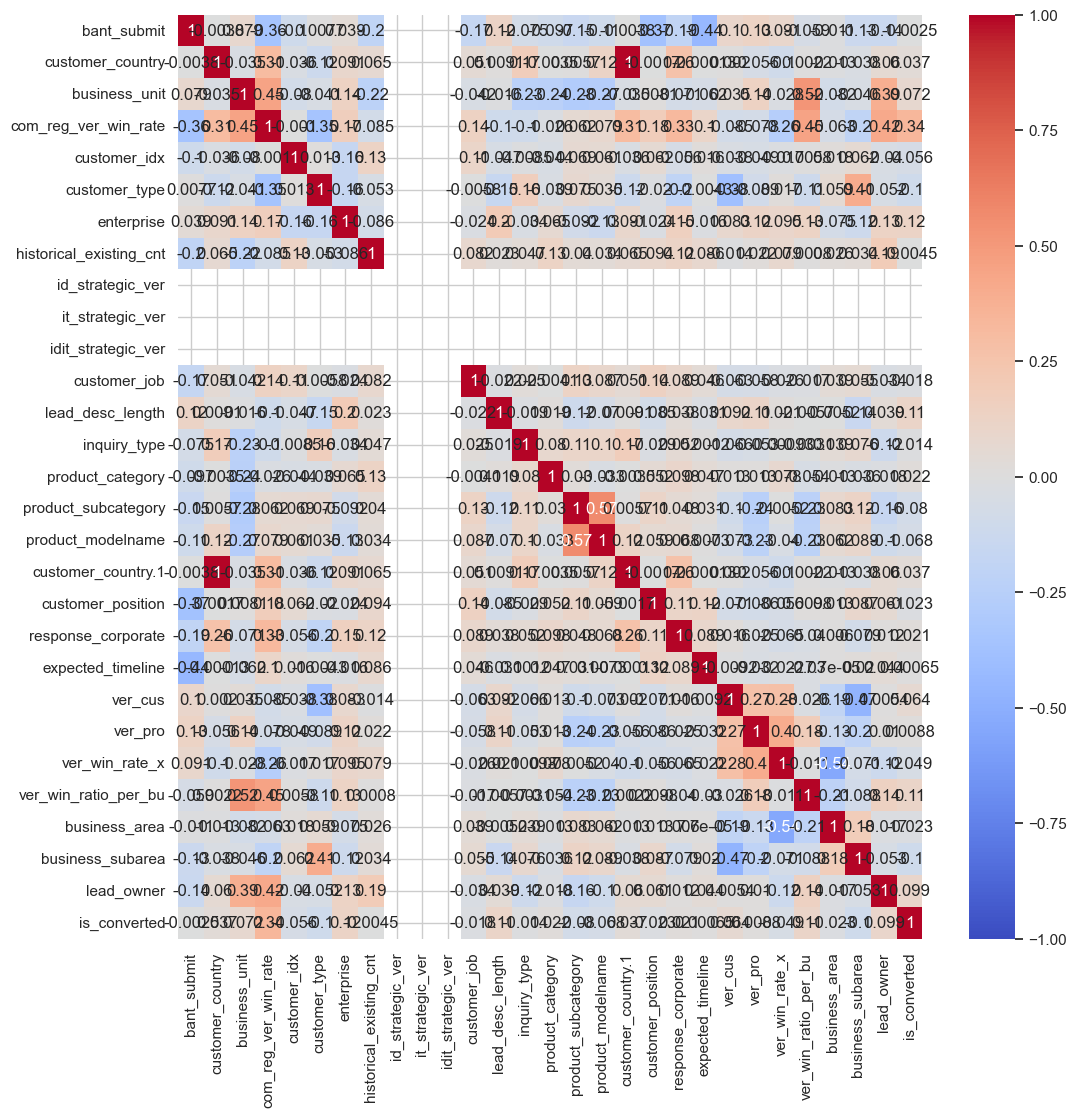

In [95]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_train.corr(), vmin = -1, vmax = 1, annot = True, cmap='coolwarm')

plt.show()

colname : enterprise(59299)

Global 기업인지, Small/Medium 규모의 기업인지 

결측값 x 

['Enterprise', 'SMB'], dtype=object

37783     21516


colname : ver_cus(59299)

특정 Vertical Level 1(사업영역) 이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 **가중치**

결측값 x 

[0, 1], dtype=int

56832     2467


colname : ver_pro(59299)

특정 Vertical Level 1(사업영역) 이면서 특정 Product Category(제품 유형)인 경우에 대한 **가중치**

결측값 x 

[0, 1], dtype=int

56286     3013


ver_win_rate_x(18147)

전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 **영업 전환 성공 비율 값**을 곱한 값

결측값 개수 41152 

dtype=float

In [57]:
ver_win_rate_x.describe()

count    18417.000000
mean         0.001117
std          0.001104
min          0.000002
25%          0.000298
50%          0.000572
75%          0.001183
max          0.003079
Name: ver_win_rate_x, dtype: float64

ver_win_ratio_per_bu(15304)

특정 Vertical Level1의 Business Unit 별 샘플 수 대비 **영업 전환된 샘플 수**의 비율을 계산

결측값 43995

dtype=float

In [60]:
ver_win_ratio_per_bu.describe()

count    15304.000000
mean         0.049288
std          0.027949
min          0.011583
25%          0.026846
50%          0.049840
75%          0.064566
max          0.285714
Name: ver_win_ratio_per_bu, dtype: float64

In [46]:
enterprise = data['enterprise']
ver_cus = data['ver_cus']
ver_pro = data['ver_pro']
ver_win_rate_x = data['ver_win_rate_x']
ver_win_ratio_per_bu = data['ver_win_ratio_per_bu']

In [31]:
data['enterprise'].describe()

count          59299
unique             2
top       Enterprise
freq           37783
Name: enterprise, dtype: object

In [27]:
len(data[data['enterprise'] == 'SMB'])

21516

In [28]:
def eda(col):
    print(col.describe())
    print(col.isnull().count())
    print(col.unique())

In [54]:
eda(ver_pro)

count    59299.000000
mean         0.050810
std          0.219612
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ver_pro, dtype: float64
59299
[0 1]


categorical column :                             **enterprise**

categorical column은 아니지만 범주화 가능 column : **ver_cus**, **ver_pro**

In [75]:
enterprise.value_counts(normalize=True)*100

enterprise
Enterprise    63.716083
SMB           36.283917
Name: proportion, dtype: float64

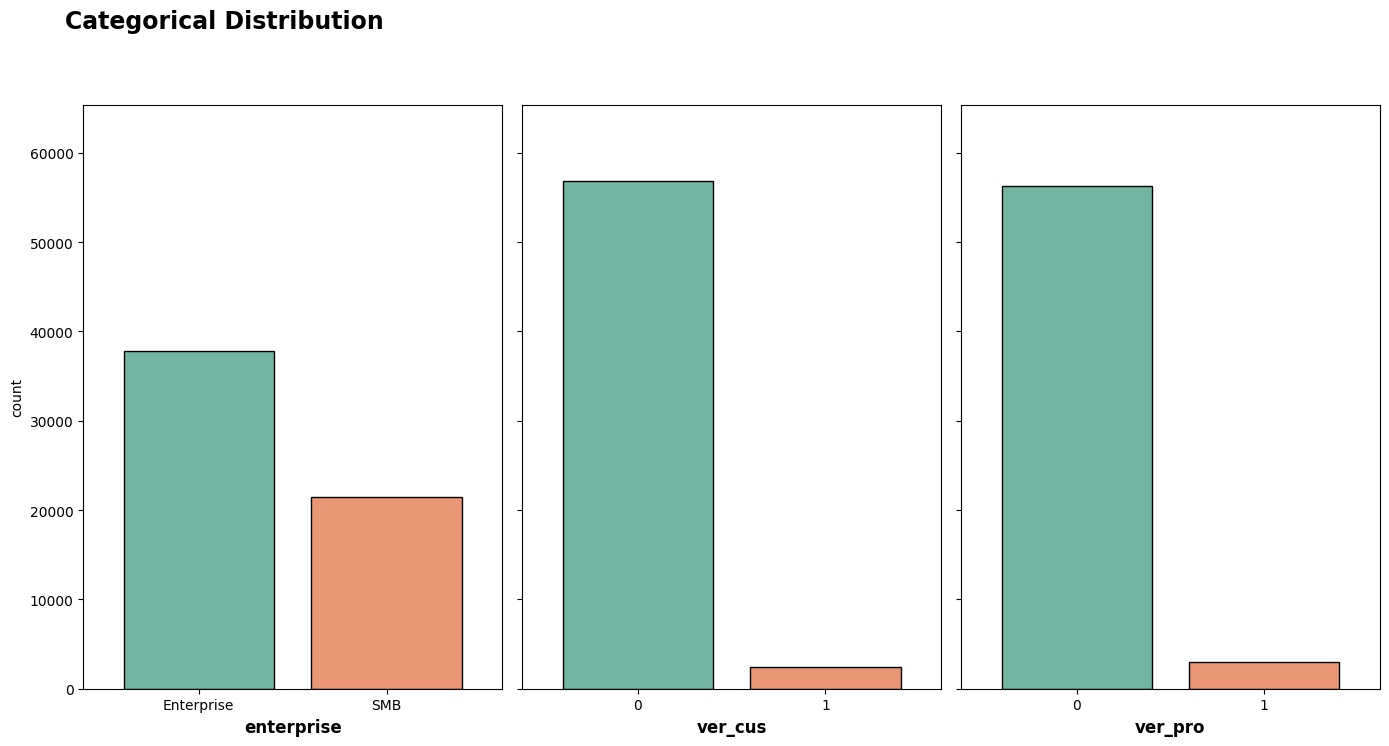

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(14, 7), sharey=True)

sns.countplot(x=enterprise, ax=axes[0], palette="Set2", edgecolor='black') 
sns.countplot(x=ver_cus, ax=axes[1], palette="Set2", edgecolor='black')
sns.countplot(x=ver_pro, ax=axes[2], palette="Set2", edgecolor='black')

# Margin & Label 조정
for ax in axes :
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

    
# figure title    
plt.suptitle('Categorical Distribution', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' # horizontal alignment
            ) 

plt.tight_layout()
plt.show()

numeric column : **ver_win_rate_x**, **ver_win_ratio_per_bu**

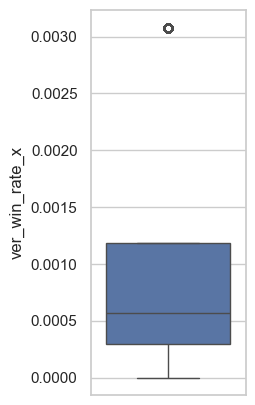

In [105]:
plt.figure(figsize = (2, 5))
sns.boxplot(y = 'ver_win_rate_x', data = data)
plt.show()

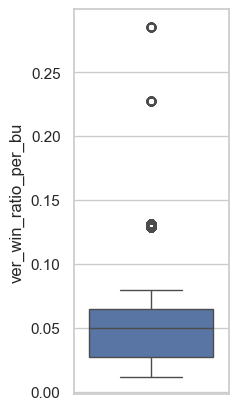

In [106]:
plt.figure(figsize = (2,5))
sns.boxplot(y = 'ver_win_ratio_per_bu', data = data)
plt.show()